# Dependencies & Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing Data Set 
df = pd.read_csv("CompanyData.csv")
df.head()

,Date,Product,Revenue
0,2023-01-01,A,100
1,2023-01-02,B,200
2,2023-01-03,A,150
3,2023-01-04,B,300
4,2023-01-05,A,120


# Expolatory Analysis

In [2]:
# Convert Data to Datetime
df['Date'] = pd.to_datetime(df['Date'])

### Revenue Per Product

In [3]:
total_revenue = df.groupby('Product')['Revenue'].sum()
print(" Revenue Per Product:\n",total_revenue)

 Revenue Per Product:
 Product
A     650
B    1380
Name: Revenue, dtype: int64


###  Daily Revenue 

In [4]:
dayly_revenue =  df.pivot(index='Date', columns='Product', values='Revenue')
print('Daily Revenue :')
print(dayly_revenue)


Daily Revenue :
Product         A      B
Date                    
2023-01-01  100.0    NaN
2023-01-02    NaN  200.0
2023-01-03  150.0    NaN
2023-01-04    NaN  300.0
2023-01-05  120.0    NaN
2023-01-06    NaN  250.0
2023-01-07  170.0    NaN
2023-01-08    NaN  350.0
2023-01-09  110.0    NaN
2023-01-10    NaN  280.0


### Average Revenue Per Product

In [5]:
avg_rev = df.groupby('Product')['Revenue'].mean()
print('\n Average Revenue Per Product')
print(avg_rev)


 Average Revenue Per Product
Product
A    130.0
B    276.0
Name: Revenue, dtype: float64


# Visualizations

### Revenue Per Product 

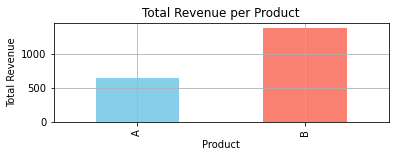

In [6]:
plt.subplot(2, 1, 2)
total_revenue.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.grid(True)

# Daily Revenue

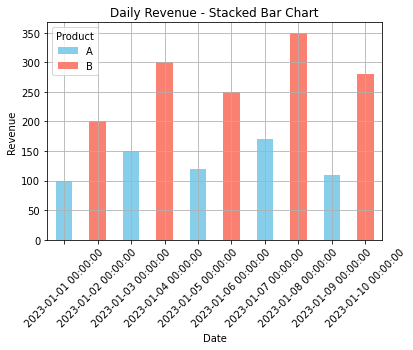

In [7]:
dayly_revenue.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Daily Revenue - Stacked Bar Chart')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.grid(True)

# Financial Ratio Analysis

#### Growth Rate 
Day To Day 

In [8]:
growth_rate = dayly_revenue.pct_change() * 100
print("Day to Day growth rate (%) :")
print(growth_rate)

Day to Day growth rate (%) :
Product             A          B
Date                            
2023-01-01        NaN        NaN
2023-01-02   0.000000        NaN
2023-01-03  50.000000   0.000000
2023-01-04   0.000000  50.000000
2023-01-05 -20.000000   0.000000
2023-01-06   0.000000 -16.666667
2023-01-07  41.666667   0.000000
2023-01-08   0.000000  40.000000
2023-01-09 -35.294118   0.000000
2023-01-10   0.000000 -20.000000


#### Visulization of Growth Rate Day to Day

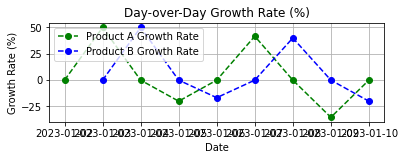

In [9]:
plt.subplot(2, 1, 1)
plt.plot(growth_rate.index, growth_rate['A'], label='Product A Growth Rate', linestyle='--', marker='o', color='green')
plt.plot(growth_rate.index, growth_rate['B'], label='Product B Growth Rate', linestyle='--', marker='o', color='blue')
plt.title('Day-over-Day Growth Rate (%)')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)